# Prediction Using ML models

In [1]:
import numpy as np
import pandas as pd

In [2]:
train=pd.read_csv("UCI_HAR_Dataset/csv_files/train.csv")
test=pd.read_csv("UCI_HAR_Dataset/csv_files/test.csv")

In [3]:
train.shape

(7352, 564)

In [4]:
test.shape

(2947, 564)

In [5]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,Subject,Activity,Activity_name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,Standing
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,Standing
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,Standing
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,Standing
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,Standing


In [6]:
test.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,Subject,Activity,Activity_name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,Standing
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,Standing
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,Standing
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,Standing
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,Standing


In [7]:
# Getting X_train and y_train from train data

X_train = train.drop(['Subject', 'Activity', 'Activity_name'], axis=1)
y_train = train.Activity

In [8]:
# Getting X_test and y_test from test data

X_test = test.drop(['Subject', 'Activity', 'Activity_name'], axis=1)
y_test = test.Activity

In [9]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


In [10]:
# Let's use Linear discriminant analysis to find features that classifies the label well

# Importing libraries

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [11]:
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [12]:
# Displaying the shape of training and testing data

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 5),(7352,))
X_test  and y_test  : ((2947, 5),(2947,))


In [13]:
X_train

array([[ 1.01313034e+01, -8.60055544e+00,  5.21162239e-01,
         1.09037804e+00, -4.05147468e+00],
       [ 9.77495009e+00, -6.96730003e+00,  3.92348588e-01,
        -4.67446046e-01, -2.31425923e+00],
       [ 9.76744618e+00, -7.14570682e+00, -1.95443793e-01,
         5.70519940e-03, -3.79579096e+00],
       ...,
       [-1.43635452e+01,  9.65910065e-01,  1.87388664e-01,
        -6.60488852e+00,  1.07714056e+00],
       [-1.45927790e+01,  1.90517082e+00, -2.37764458e-01,
        -7.29575590e+00,  7.11986449e-01],
       [-1.55640098e+01,  2.15495054e+00, -5.00240320e-01,
        -6.36047398e+00,  4.88940269e-01]])

# Generic Functions to create ML Models

**Function to plot confusion matrix**

In [14]:
# Importing necessary libraries

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [15]:
# Creating a function to print text in Bold and in given color

from IPython.display import Markdown, display

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [16]:
# Function to plot Confusion Matrix

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [17]:
# Generic function to any model

from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # Let's create an empty dictionary to be returned by the function
    results = dict()
    
    # Let's calculate & print the total training time
    
    train_start_time = datetime.now()
    model.fit(X_train, y_train)
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    printmd('Training_time(HH:MM:SS.ms) - {}'.format(results['training_time']), color='blue')
        
    # Let's calculate & print the test time
    
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    printmd('testing time(HH:MM:SS:ms) - {}'.format(results['testing_time']), color='blue')
    results['predicted'] = y_pred
   
    # Let's calculate the Accuracy of Model
    
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    results['accuracy'] = accuracy
    printmd('**Accuracy:**', color='blue')
    print('{}'.format(accuracy))
        
    # Let's get the Confusion Matrix
    
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    # Plotting Confusion Matrix
    
    printmd('**Confusion Matrix:**', color='blue')
    plt.figure(figsize=(8,8))
    plt.grid(False)
    plot_confusion_matrix(cm, classes=labels, title='Normalized confusion matrix', cmap=plt.cm.YlGn, )
    plt.show()
        
    # Plotting Normalized Confusion Matrix
    
    printmd('**Normalized Confusion Matrix:**', color='blue')
    plt.figure(figsize=(8,8))
    plt.grid(False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # PLotting classification report
    
    printmd('**Classifiction Report**', color='blue')
    classification_report = metrics.classification_report(y_test, y_pred)
    results['classification_report'] = classification_report
    print(classification_report)
    
    # Adding the trained model to the results
    
    results['model'] = model
    
    return results

In [18]:
def print_grid_search_attributes(model):
    
    # Let's print the best estimator that gave highest score
    
    printmd('**Best Estimator:**', color='blue')
    print('{}\n'.format(model.best_estimator_))


    # Let's print the best parameters that gave best results
    
    printmd('**Best parameters:**', color='blue')
    print('{}\n'.format(model.best_params_))


    #  Let's print the number of cross validation splits
    
    printmd('**Number of CrossValidation sets:**', color='blue')
    print('{}\n'.format(model.n_splits_))


    # Let's print the Best score of the best estimator
    
    printmd('**Best Score:**', color='blue')
    print('{}\n'.format(model.best_score_))

# Applying Various ML models

## 1. Logistic Regression

In [19]:
# Importing necessary libraries

from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

# Creating a list labels to be added to plots

labels=['Laying', 'Sitting','Standing','Walking','Walking_Downstairs','Walking_Upstairs']

Fitting 5 folds for each of 10 candidates, totalling 50 fits


<span style='color:blue'>Training_time(HH:MM:SS.ms) - 0:00:06.998014</span>

<span style='color:blue'>testing time(HH:MM:SS:ms) - 0:00:00.001079</span>

<span style='color:blue'>**Accuracy:**</span>

0.9619952494061758


<span style='color:blue'>**Confusion Matrix:**</span>

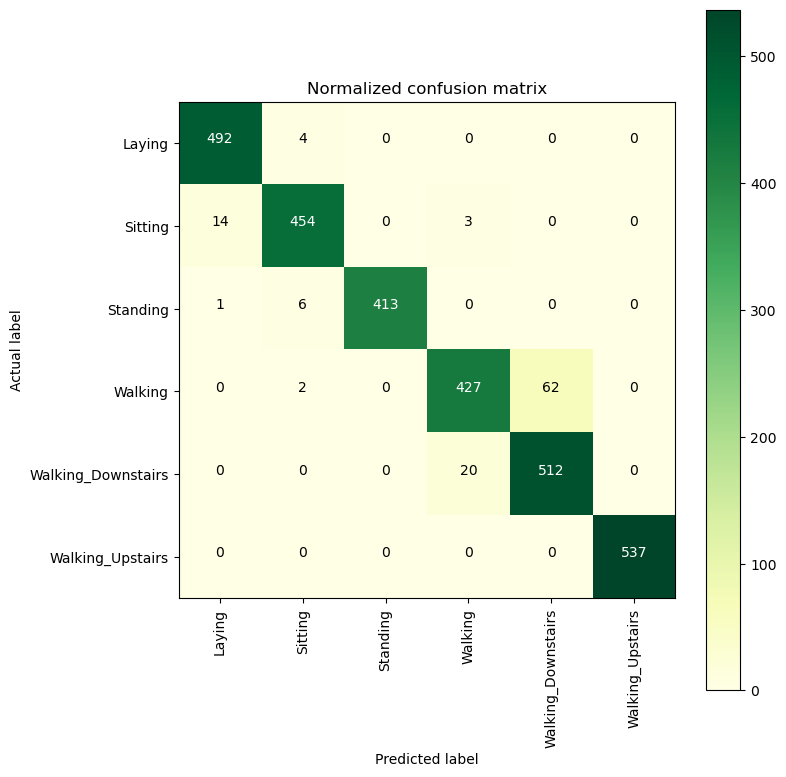

<span style='color:blue'>**Normalized Confusion Matrix:**</span>

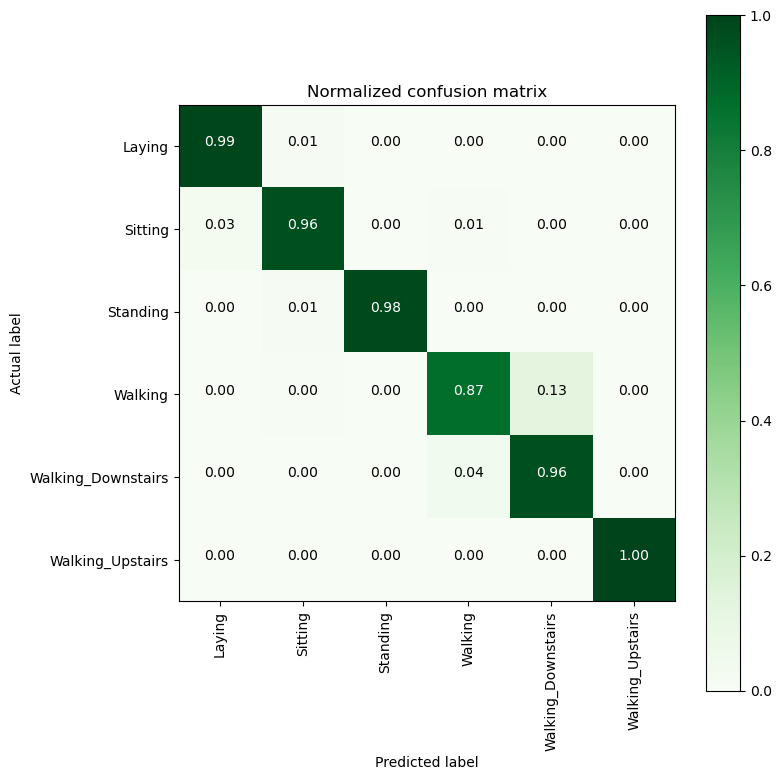

<span style='color:blue'>**Classifiction Report**</span>

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       496
           2       0.97      0.96      0.97       471
           3       1.00      0.98      0.99       420
           4       0.95      0.87      0.91       491
           5       0.89      0.96      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



<span style='color:blue'>**Best Estimator:**</span>

LogisticRegression(C=35, max_iter=1000, penalty='l1', solver='liblinear')



<span style='color:blue'>**Best parameters:**</span>

{'C': 35, 'penalty': 'l1'}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

5



<span style='color:blue'>**Best Score:**</span>

0.9847663443351508



In [20]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameters to be tuned
parameters = {'C': [20, 25, 30, 35, 40], 'penalty': ['l1', 'l2']}

# Initialize Logistic Regression model with solver 'liblinear' to support L1 regularization
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)

# Set up GridSearchCV for hyperparameter tuning
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, verbose=1, n_jobs=-1)

# Fit the grid search on the training data
log_reg_grid_results = perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Print the best attributes of the grid search model
print_grid_search_attributes(log_reg_grid_results['model'])



## 2.Support Vector Classifier

In [21]:
# Importing Necessary libraries

from sklearn.svm import LinearSVC

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\nagun\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<span style='color:blue'>Training_time(HH:MM:SS.ms) - 0:00:00.816720</span>

<span style='color:blue'>testing time(HH:MM:SS:ms) - 0:00:00.001022</span>

<span style='color:blue'>**Accuracy:**</span>

0.9552086868001357


<span style='color:blue'>**Confusion Matrix:**</span>

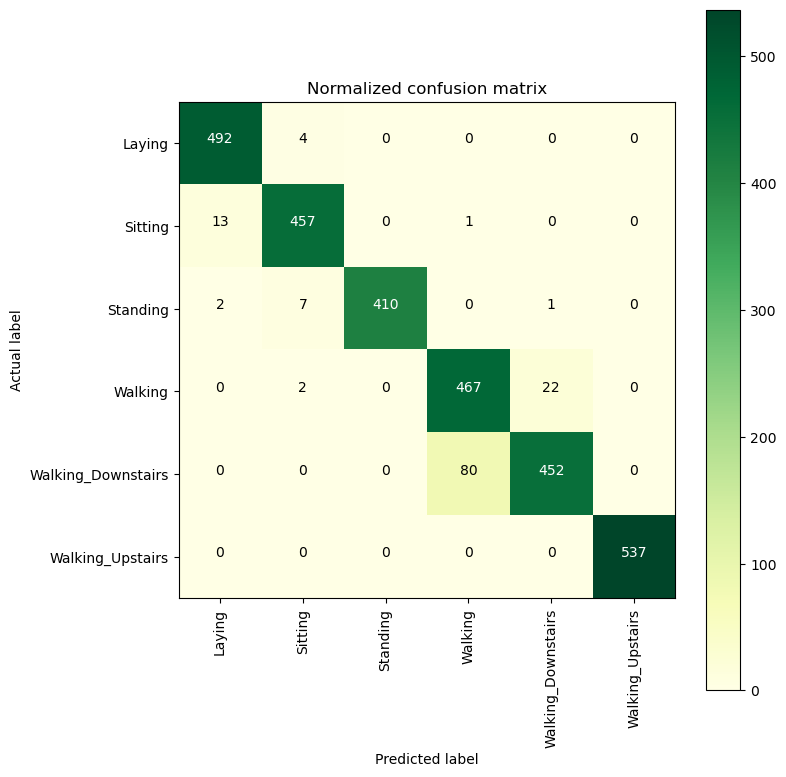

<span style='color:blue'>**Normalized Confusion Matrix:**</span>

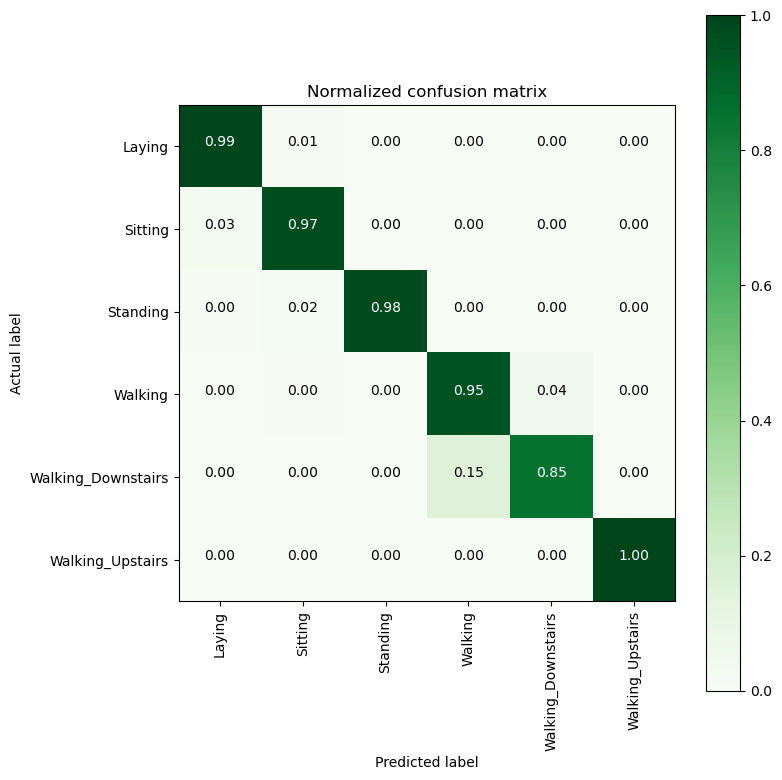

<span style='color:blue'>**Classifiction Report**</span>

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       496
           2       0.97      0.97      0.97       471
           3       1.00      0.98      0.99       420
           4       0.85      0.95      0.90       491
           5       0.95      0.85      0.90       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



<span style='color:blue'>**Best Estimator:**</span>

LinearSVC(C=8)



<span style='color:blue'>**Best parameters:**</span>

{'C': 8}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

5



<span style='color:blue'>**Best Score:**</span>

0.9861264260972913



In [22]:
# Let's define the parameters to be tuned

parameters = {'C':[0.25, 0.5, 1, 2, 4, 8]}

# Let's initiate the model

lin_svc = LinearSVC()
lin_svc_grid = GridSearchCV(lin_svc, param_grid=parameters, verbose=1, n_jobs=-1)
lin_svc_grid_results = perform_model(lin_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Printing the best attributes of the model 

print_grid_search_attributes(lin_svc_grid_results['model'])

## 3.Kernal SVM

In [23]:
# Importing Libraries

from sklearn.svm import SVC

Fitting 5 folds for each of 16 candidates, totalling 80 fits


<span style='color:blue'>Training_time(HH:MM:SS.ms) - 0:00:21.658556</span>

<span style='color:blue'>testing time(HH:MM:SS:ms) - 0:00:00.315190</span>

<span style='color:blue'>**Accuracy:**</span>

0.9684424838819138


<span style='color:blue'>**Confusion Matrix:**</span>

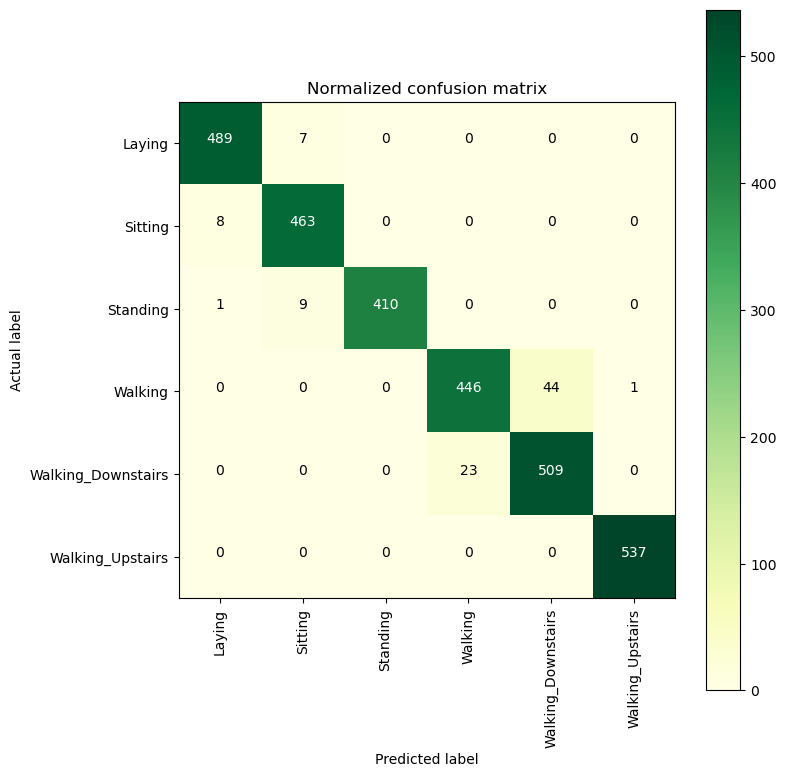

<span style='color:blue'>**Normalized Confusion Matrix:**</span>

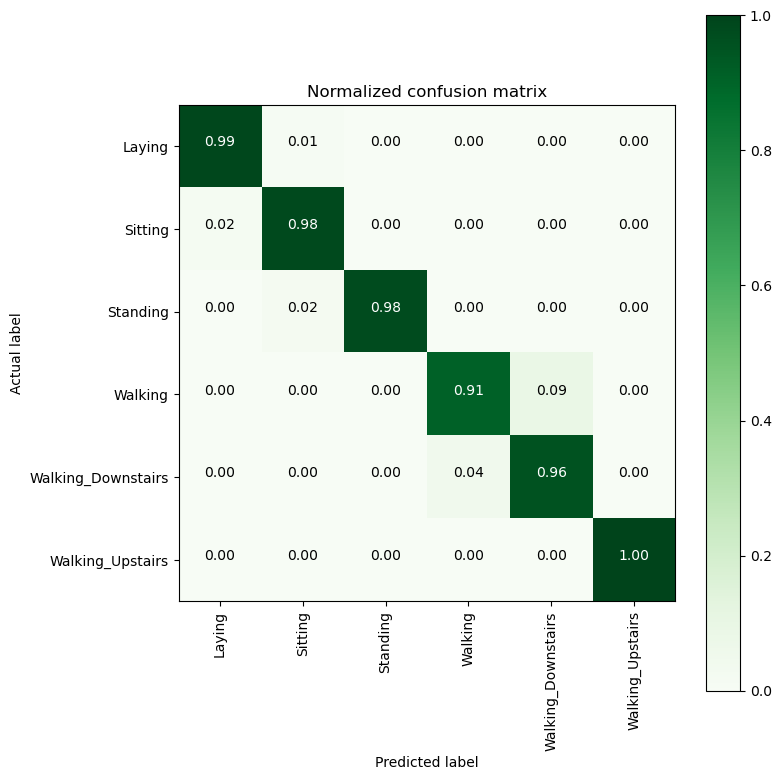

<span style='color:blue'>**Classifiction Report**</span>

              precision    recall  f1-score   support

           1       0.98      0.99      0.98       496
           2       0.97      0.98      0.97       471
           3       1.00      0.98      0.99       420
           4       0.95      0.91      0.93       491
           5       0.92      0.96      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947



<span style='color:blue'>**Best Estimator:**</span>

SVC(C=0.125, gamma=0.1)



<span style='color:blue'>**Best parameters:**</span>

{'C': 0.125, 'gamma': 0.1}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

5



<span style='color:blue'>**Best Score:**</span>

0.9861267035706194



In [24]:
# Importing necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameters to be tuned
parameters = {'C': [0.125, 0.25, 0.5, 1], 'gamma': [0.01, 0.1, 1, 2]}

# Initialize the SVC model with RBF kernel
rbf_svc = SVC(kernel='rbf')

# Set up GridSearchCV with verbosity
rbf_svc_grid = GridSearchCV(rbf_svc, param_grid=parameters, verbose=1, n_jobs=-1)

# Run model with the perform_model function
rbf_svc_grid_results = perform_model(rbf_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Print the best attributes of the grid search model
print_grid_search_attributes(rbf_svc_grid_results['model'])


## 4.Decision Tree

In [25]:
# Importing libraries

from sklearn.tree import DecisionTreeClassifier

Fitting 5 folds for each of 6 candidates, totalling 30 fits


<span style='color:blue'>Training_time(HH:MM:SS.ms) - 0:00:00.435048</span>

<span style='color:blue'>testing time(HH:MM:SS:ms) - 0:00:00.001000</span>

<span style='color:blue'>**Accuracy:**</span>

0.9514760773668137


<span style='color:blue'>**Confusion Matrix:**</span>

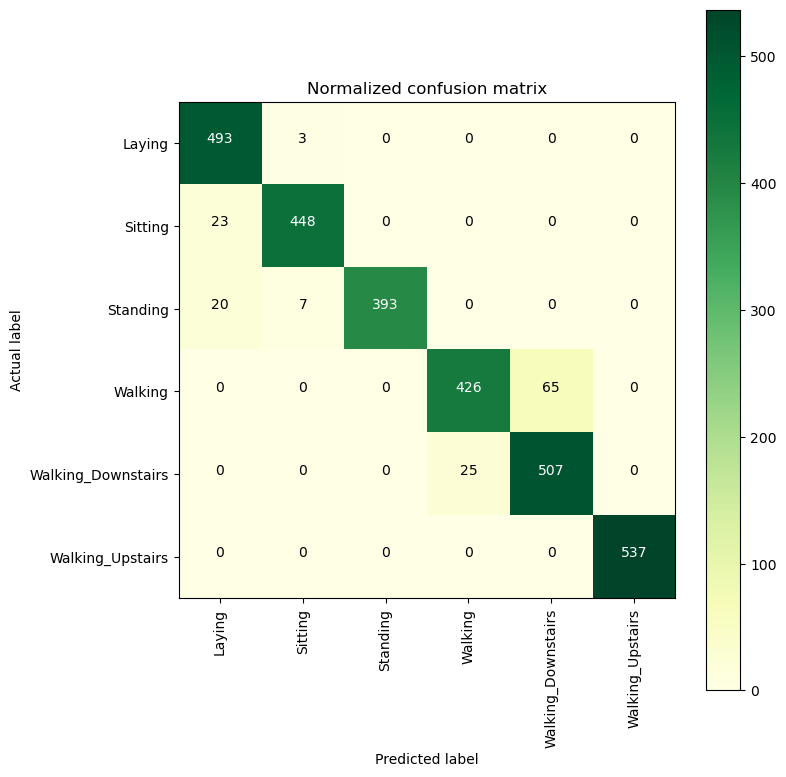

<span style='color:blue'>**Normalized Confusion Matrix:**</span>

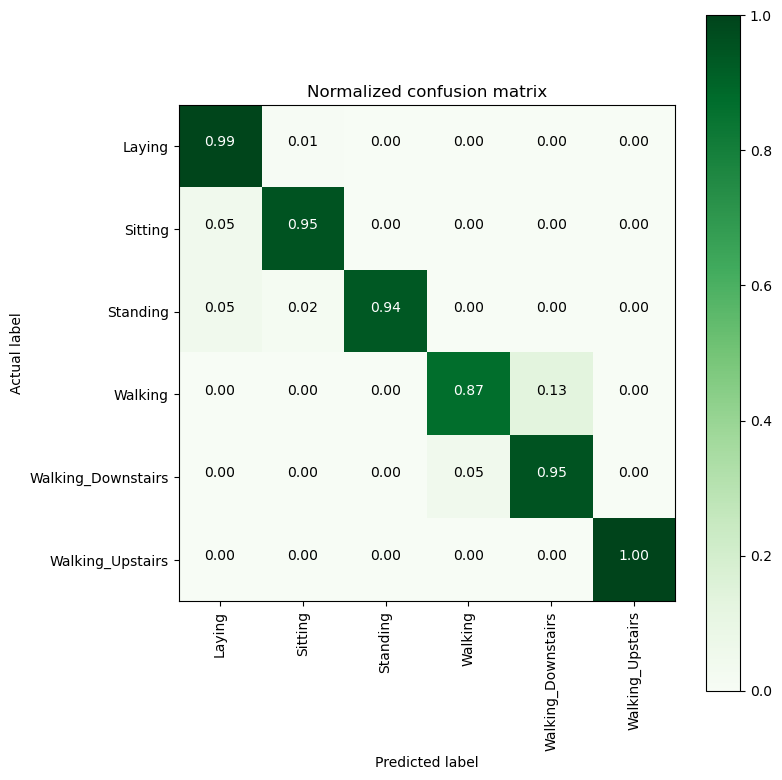

<span style='color:blue'>**Classifiction Report**</span>

              precision    recall  f1-score   support

           1       0.92      0.99      0.96       496
           2       0.98      0.95      0.96       471
           3       1.00      0.94      0.97       420
           4       0.94      0.87      0.90       491
           5       0.89      0.95      0.92       532
           6       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



<span style='color:blue'>**Best Estimator:**</span>

DecisionTreeClassifier(max_depth=5)



<span style='color:blue'>**Best parameters:**</span>

{'max_depth': 5}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

5



<span style='color:blue'>**Best Score:**</span>

0.9829986542543597



In [26]:
# Let's define the parameters to be tuned

parameters = {'max_depth':np.arange(4,10,1)}

# Let's initiate the model

dtree = DecisionTreeClassifier()
dtree_grid = GridSearchCV(dtree, param_grid=parameters, verbose=1, n_jobs=-1)
dtree_grid_results = perform_model(dtree_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Printing the best attributes of the model 

print_grid_search_attributes(dtree_grid_results['model'])

## 5.Random Forest

In [27]:
# Importing libraries

from sklearn.ensemble import RandomForestClassifier

<span style='color:blue'>Training_time(HH:MM:SS.ms) - 0:00:45.972255</span>

<span style='color:blue'>testing time(HH:MM:SS:ms) - 0:00:00.107381</span>

<span style='color:blue'>**Accuracy:**</span>

0.9619952494061758


<span style='color:blue'>**Confusion Matrix:**</span>

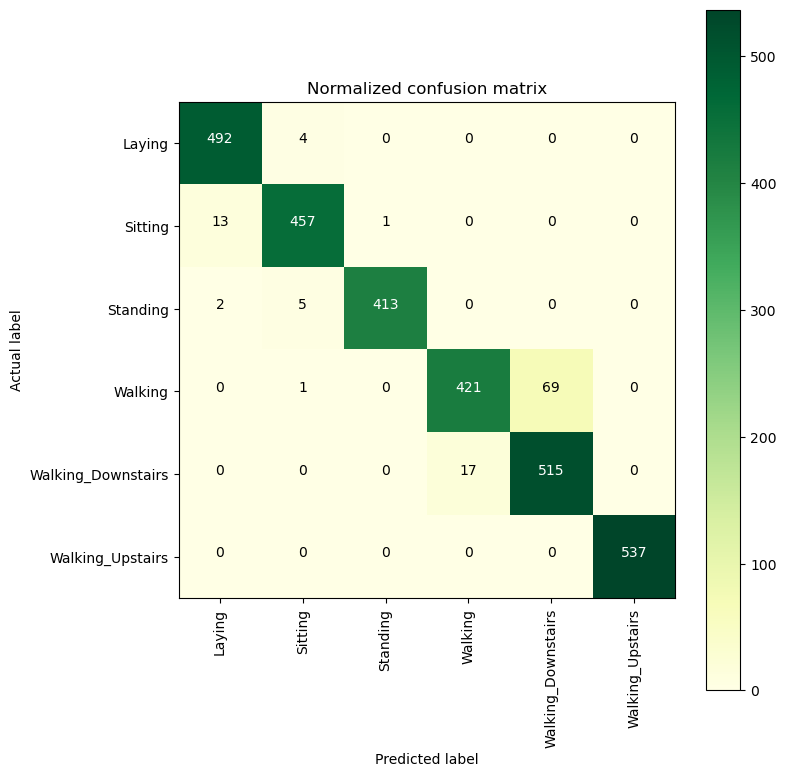

<span style='color:blue'>**Normalized Confusion Matrix:**</span>

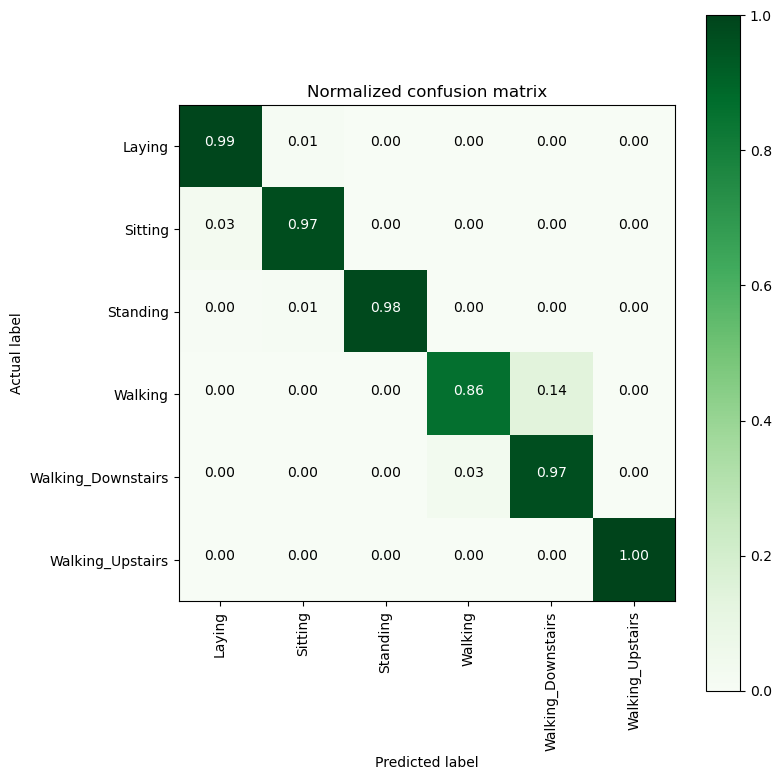

<span style='color:blue'>**Classifiction Report**</span>

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       496
           2       0.98      0.97      0.97       471
           3       1.00      0.98      0.99       420
           4       0.96      0.86      0.91       491
           5       0.88      0.97      0.92       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



<span style='color:blue'>**Best Estimator:**</span>

RandomForestClassifier(max_depth=6, n_estimators=190)



<span style='color:blue'>**Best parameters:**</span>

{'max_depth': 6, 'n_estimators': 190}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

5



<span style='color:blue'>**Best Score:**</span>

0.9855827633568722



In [28]:
# Let's define the parameters to be tuned

parameters = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(4,15,2)}

# Let's initiate the model

rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=parameters, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Printing the best attributes of the model 

print_grid_search_attributes(rfc_grid_results['model'])

In [30]:
# Importing Libraries

from sklearn.ensemble import GradientBoostingClassifier

<span style='color:blue'>Training_time(HH:MM:SS.ms) - 0:03:13.106262</span>

<span style='color:blue'>testing time(HH:MM:SS:ms) - 0:00:00.074159</span>

<span style='color:blue'>**Accuracy:**</span>

0.9531727180183237


<span style='color:blue'>**Confusion Matrix:**</span>

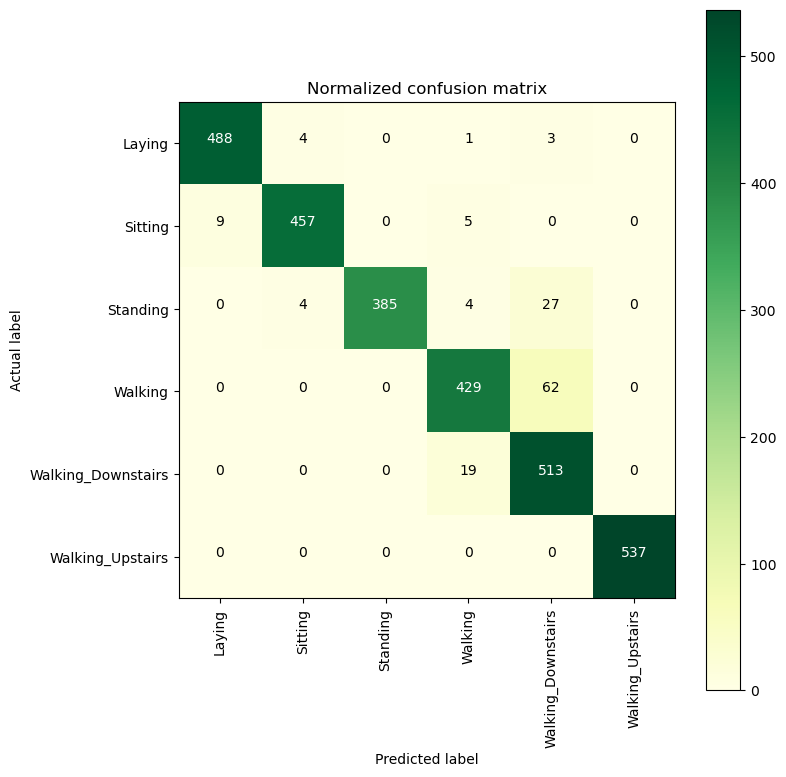

<span style='color:blue'>**Normalized Confusion Matrix:**</span>

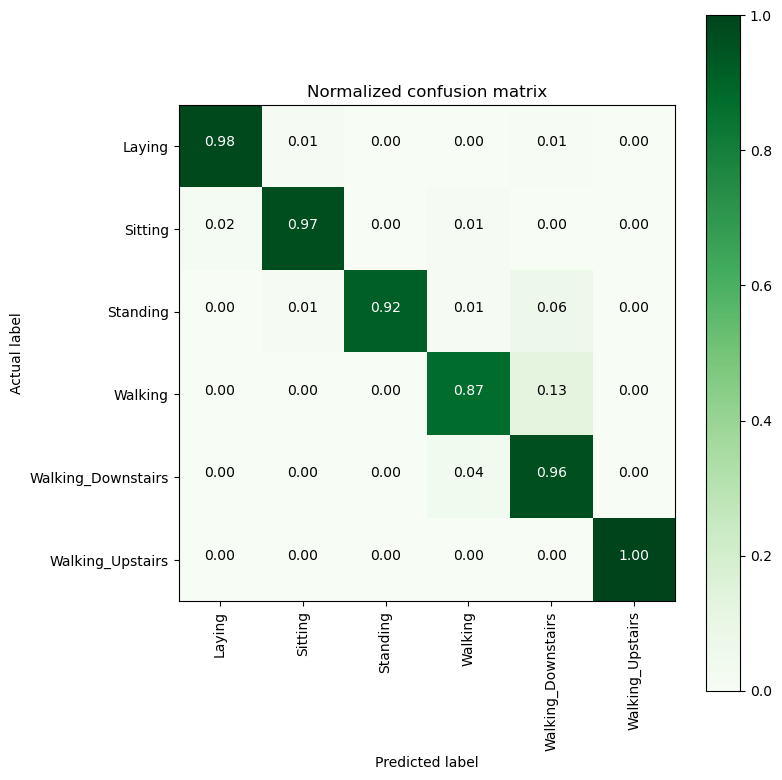

<span style='color:blue'>**Classifiction Report**</span>

              precision    recall  f1-score   support

           1       0.98      0.98      0.98       496
           2       0.98      0.97      0.98       471
           3       1.00      0.92      0.96       420
           4       0.94      0.87      0.90       491
           5       0.85      0.96      0.90       532
           6       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.96      0.95      0.95      2947
weighted avg       0.96      0.95      0.95      2947



<span style='color:blue'>**Best Estimator:**</span>

GradientBoostingClassifier(max_depth=5, n_estimators=140)



<span style='color:blue'>**Best parameters:**</span>

{'max_depth': 5, 'n_estimators': 140}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

5



<span style='color:blue'>**Best Score:**</span>

0.9805507845558346



In [31]:
# Let's define the parameters to be tuned

parameters = {'n_estimators': np.arange(120,150,10), 'max_depth':np.arange(3,7,1)}

# Let's initiate the model

gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=parameters, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Printing the best attributes of the model 

print_grid_search_attributes(gbdt_grid_results['model'])

In [32]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%      {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lin_svc_grid_results['accuracy'] * 100,\
                                                        100-(lin_svc_grid_results['accuracy'] * 100)))

print('RBF SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svc_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svc_grid_results['accuracy'] * 100)))

print('Decision Tree       : {:.04}%      {:.04}% '.format(dtree_grid_results['accuracy'] * 100,\
                                                        100-(dtree_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%       {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting    : {:.04}%      {:.04}% '.format(gbdt_grid_results['accuracy'] * 100,\
                                                        100-(gbdt_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.2%      3.8%
Linear SVC          : 95.52%       4.479% 
RBF SVM classifier  : 96.84%      3.156% 
Decision Tree       : 95.15%      4.852% 
Random Forest       : 96.2%       3.8% 
GradientBoosting    : 95.32%      4.683% 
